In [1]:
# here we import needed libraries
import pandas as pd
import numpy as np

In [2]:
# here we upload our data into the working area
from google.colab import files
upload=  files.upload()

Saving salary1.csv to salary1.csv


In [3]:
# here we read our data into the proram

dataset = pd.read_csv('salary1.csv')

In [4]:
# here we samarize our data
print(dataset.shape)
print(dataset.head(10))

(32561, 5)
   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0
5   34              9             0              45       0
6   38              6             0              40       0
7   74             16             0              20       1
8   68              9             0              40       0
9   41             10             0              60       1


In [5]:
"""set_income = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50k':0,'>50k':1}).astype(int)
print(dataset.head)"""

"set_income = set(dataset['income'])\ndataset['income'] = dataset['income'].map({'<=50k':0,'>50k':1}).astype(int)\nprint(dataset.head)"

In [6]:
# Here we segregate oyr data into x and y
x = dataset.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [7]:
y =dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [8]:
#here wee split our data into test and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=0)


In [9]:
# here we do preprocessing of our data by rescalling it using Standardized Scaling technique
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

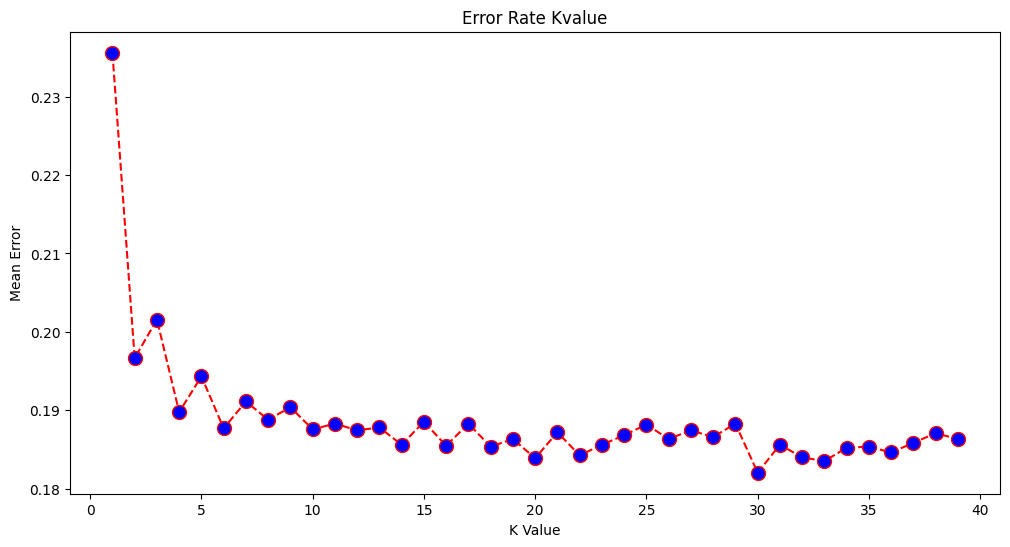

In [103]:
# here we find the best K-Value
# we will first identify the mean error by ploting a graph.
# after ploting, we identify where the mean error is smallest
# in ploting, we plot kvalue(as x) and mean Error(as y)
from  sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
error =[]
# we calculate error for when we put K values from 1 to 40. this will help us find mean error for each k between 1 and 40
# thiis will help us to determin the best K Value
for i in range(1,40): # this specifies the number of times the iteration is will be done
  model = KNeighborsClassifier(n_neighbors=i) # here we select a model and assign it to  a variable. the k-value is "i"
  model.fit(x_train,y_train)     # here we fit our training data into the model to train it
  pred_i = model.predict(x_test) # here we perfome a prediction, and the prediction is going to be done 40 times
  error.append(np.mean(pred_i !=y_test)) # here we find the mean error for each of the iteratioons

plt.figure(figsize=(12,6)) # this will determine the size of the chart
plt.plot(range(1, 40),error, color ='red', linestyle ='dashed', marker='o',
         markerfacecolor='blue', markersize=10) # here we plot a graph which has the k values as x-axes and error as y-axis
plt.title('Error Rate Kvalue') #  here we assing labels on our chart
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [105]:
# here we train our model

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [111]:
# now we do the prediciton
age = int(input("Enter new emplooyee age:  "))
edu = int(input("Enter new employee education: "))
cg = int(input("Enter new employee Capital Gains: "))
wh = int(input("Enter new employee Hours per week: "))

newEmp =[[age,edu,cg,wh]]
results = model.predict(sc.transform(newEmp))

if results ==1:
         print("Employee might have got salary above 50K")
else:
          print("Employee might have got salary bellow 50K")


Enter new emplooyee age:  74
Enter new employee education: 16
Enter new employee Capital Gains: 0
Enter new employee Hours per week: 20
Employee might have got salary bellow 50K


In [112]:
# here we test our model to validate it

y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [116]:
# here we validate our model using confusion model

from sklearn.metrics import confusion_matrix, accuracy_score
confMa = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ", confMa)

print("accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix:  [[5864  329]
 [1181  767]]
accuracy of the model: 81.45191008475618%


In [10]:
np.mean?

In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?